Boston House Price Prediction

The objective of the project is to predict the value of the house price with the given input features.

In [46]:
# The python libraries used for this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

In [47]:
#Importing the dataset
dataset = pd.read_csv('/content/HousingData.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


EXPLORATORY DATA ANALYSIS

Let us find the basic details from the train dataset

In [48]:
dataset.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [49]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [51]:
dataset.shape

(506, 14)

FEATURE ENGINEERING

In [52]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [53]:
dataset['CRIM'].fillna(dataset['CRIM'].mean(),inplace=True)
dataset['ZN'].fillna(dataset['ZN'].mean(),inplace=True)
dataset['INDUS'].fillna(dataset['INDUS'].mean(),inplace=True)
dataset['CHAS'].fillna(dataset['CHAS'].mean(),inplace=True)
dataset['AGE'].fillna(dataset['AGE'].mean(),inplace=True)
dataset['LSTAT'].fillna(dataset['LSTAT'].mean(),inplace=True)

In [54]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

MODEL BUILDING

In [55]:
X = dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = dataset['MEDV']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4,random_state = 10)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


Linear Regression

In [58]:
# Linear Regression
Reg_model = LinearRegression()

In [59]:
Reg_model.fit(X_train,y_train)
print('Coefficient :',Reg_model.coef_)

Coefficient : [-1.45823730e-01  5.66325496e-02 -4.60045147e-02  2.29419391e+00
 -1.54615192e+01  4.06619394e+00 -1.07210702e-03 -1.51657956e+00
  2.43576195e-01 -1.05413581e-02 -8.21104250e-01  1.20930516e-02
 -4.51823225e-01]


In [60]:
coefficient = pd.DataFrame(Reg_model.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
CRIM,-0.145824
ZN,0.056633
INDUS,-0.046005
CHAS,2.294194
NOX,-15.461519
RM,4.066194
AGE,-0.001072
DIS,-1.516580
RAD,0.243576
TAX,-0.010541


In [61]:
y_pred = Reg_model.predict(X_test)
# We are predicting the prices of the house using the regression model developed

In [62]:
y_pred

array([30.84319591, 32.41191622, 30.72148538, 20.00341679, 17.97962849,
       16.09771273, 35.6254112 , 14.58962286, 25.73920781, 33.03632641,
       21.56421911, 31.74690229, 28.00085575, 33.77849074, 30.63665906,
       40.85008023, 24.57727903, 23.06387593, 25.69199944, 21.91858153,
       32.78483329, 17.47624113, 25.33288091, 25.08599009, 32.48836932,
       20.3998172 , 19.8807113 , 17.5614321 , 39.53435735,  0.68880663,
       33.13217417, 32.15944866, 26.03950329, 24.53266774, 20.40517879,
       19.65313842,  4.79311929, 35.11259437, 26.69248894, 27.71424638,
       31.32254589, 29.52087411, 18.19360149, 31.76143046, 18.24353439,
       28.43178734, 18.69189306, 21.05277262, 38.50894053, 16.49418804,
       23.95090243, 19.36375577, 24.34210734, 35.45850061, 26.51816378,
       35.12596189, 21.2300043 , 19.24570935, 18.37994827, 25.25178748,
       19.64817126, 23.34314352, 40.69935183, 43.66740431, 30.61962652,
       17.1430598 , 24.04804331,  2.83444296, 30.47772363, 30.15

In [63]:
predicted_dataframe = pd.DataFrame({'Predicted Prices': y_pred,
                                    'Actual Prices': y_test})
print(predicted_dataframe)
# the comparison between predicted and actual prices are listed

     Predicted Prices  Actual Prices
305         30.843196           28.4
193         32.411916           31.1
65          30.721485           23.5
349         20.003417           26.6
151         17.979628           19.6
..                ...            ...
58          21.743637           23.3
303         31.313351           33.1
217         27.871697           28.7
57          33.462180           31.6
87          24.038171           22.2

[203 rows x 2 columns]


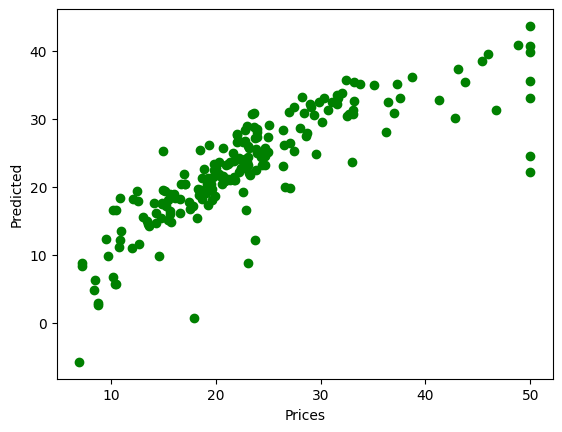

In [64]:
plt.scatter(y_test,y_pred,color = 'g')
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.show()
# Scatter plot for the house price predicted

Model Evaluation

In [65]:
y_train_pred = Reg_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('Model Performance for training set')
print('----------------------------------')
print('Root Mean Squared Error: ',rmse)
print('R2 score: ',r2)

Model Performance for training set
----------------------------------
Root Mean Squared Error:  4.438298313118966
R2 score:  0.7521554704637767


In [66]:
y_test_pred = Reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)
print('Model Performance for test set')
print('------------------------------')
print('Mean Squared Error: ',rmse)
print('R2 score: ',r2)

Model Performance for test set
------------------------------
Mean Squared Error:  5.284485642261038
R2 score:  0.6926851219755359


XGBoost Regressor

In [67]:
#XGBoost
XGB_model = XGBRegressor()

In [68]:
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred = XGB_model.predict(X_test)
y_pred

array([28.411776 , 26.958628 , 26.282211 , 24.48233  , 20.24548  ,
       13.478474 , 45.02059  , 16.32691  , 22.444462 , 37.927193 ,
       20.337633 , 25.660543 , 25.541534 , 29.950424 , 25.265501 ,
       34.574886 , 24.614742 , 22.77407  , 21.397623 , 17.555752 ,
       35.48657  , 15.583315 , 21.692533 , 24.549616 , 35.90155  ,
       18.592823 , 18.667814 , 15.094757 , 42.732075 , 10.758373 ,
       32.344852 , 34.362957 , 23.785816 , 25.23706  , 17.353943 ,
       20.24011  ,  8.586356 , 33.208908 , 22.723614 , 23.01312  ,
       36.103153 , 23.36057  ,  8.888377 , 28.955261 , 19.64363  ,
       25.227787 , 20.53357  , 15.766257 , 50.287685 , 14.520182 ,
       19.741833 , 13.028811 , 22.436443 , 47.076912 , 23.351332 ,
       35.116592 , 20.76506  , 20.502897 , 23.500532 , 25.657593 ,
       19.174646 , 22.333368 , 45.737236 , 41.370216 , 29.229898 ,
       15.984336 , 22.086624 , 10.130922 , 26.384256 , 39.469498 ,
       14.490319 , 25.964579 , 20.730865 , 42.30971  , 23.1207

In [70]:
predicted_dataframe = pd.DataFrame({'Predicted values':y_pred,
                                    'Actual values': y_test})
predicted_dataframe
# the comparison between predicted and actual prices are listed

,Predicted values,Actual values
305,28.411776,28.4
193,26.958628,31.1
65,26.282211,23.5
349,24.482330,26.6
151,20.245480,19.6
...,...,...
58,22.842920,23.3
303,32.623505,33.1
217,23.721521,28.7
57,29.287338,31.6


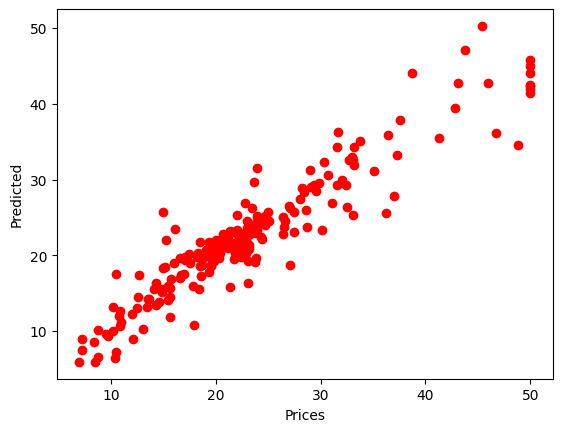

In [71]:
plt.scatter(y_test,y_pred,color = 'r')
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.show()
# Scatter plot for the house price predicted

Model Evaluation

In [72]:
y_train_pred = XGB_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('Model Performance for training set')
print('----------------------------------')
print('Root Mean Squared Error: ',rmse)
print('R2 score: ',r2)

Model Performance for training set
----------------------------------
Root Mean Squared Error:  0.00676147949564704
R2 score:  0.9999994247854941


In [73]:
y_test_pred = XGB_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)

print('Model Performance for testing set')
print('----------------------------------')
print('Root Mean Squared Error: ',rmse)
print('R2 score: ',r2)

Model Performance for testing set
----------------------------------
Root Mean Squared Error:  3.358053838948295
R2 score:  0.8759052377563583


House price prediction regression model using Linear regression and XGBoost Regressor were developed here. From the model evaluation it is evident that, the training set R2 score is slightly higher than test set R2 score, indicating slight overfit behaviour which should be fine.
The R2 score is best in the XGBoost regressor, hence it can be concluded the XGBoost works fine with this dataset.